# My CNN 

## Dataset loading

In [1]:
import tensorflow as tf
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download test

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


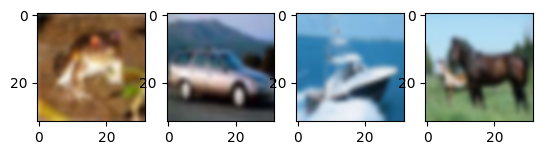

In [4]:
plt.subplot(141)
plt.imshow(x_train[0][:][:][:], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## Normalize (traning set 건드린 값으로, test set도 정규화)

120.70756512369792 64.1500758911213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-2.5247951877342226e-17 1.0000000000000022


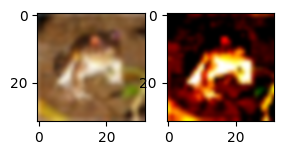

In [5]:
new_x_train = x_train
new_x_test = x_test

_mean = np.mean(x_train)
_std = np.std(x_train)
print(_mean, _std)
new_x_train = (new_x_train - _mean)/_std
new_x_test = (new_x_test - _mean)/_std
_mean = np.mean(new_x_train)
_std = np.std(new_x_train)
print(_mean, _std)
plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(new_x_train[0][:][:], interpolation="bicubic")
plt.grid(False)
plt.show()

## Traning

In [8]:


model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(32, 32,1)),
  tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', strides=1, activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', strides=1, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=1),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', strides=1, activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#tf.keras.utils.plot_model(model, to_file='model02.png', show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       1664      
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 31, 31, 32)        8224      
                                                      

In [9]:
val_scaled = new_x_test
val_target = y_test

history = model.fit(new_x_train, y_train, batch_size=256, epochs=8, validation_data=(val_scaled, val_target))
model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)

2022-12-28 18:54:11.101669: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-12-28 18:54:11.481974: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/8
196/196 [==============================] - 10s 48ms/step - loss: 1.8010 - accuracy: 0.3667 - val_loss: 1.4301 - val_accuracy: 0.5023
Epoch 2/8
196/196 [==============================] - 9s 45ms/step - loss: 1.2473 - accuracy: 0.5547 - val_loss: 1.1672 - val_accuracy: 0.5812
Epoch 3/8
196/196 [==============================] - 9s 45ms/step - loss: 1.0104 - accuracy: 0.6402 - val_loss: 0.9701 - val_accuracy: 0.6667
Epoch 4/8
196/196 [==============================] - 9s 45ms/step - loss: 0.8677 - accuracy: 0.6923 - val_loss: 0.9032 - val_accuracy: 0.6851
Epoch 5/8
196/196 [==============================] - 9s 46ms/step - loss: 0.7388 - accuracy: 0.7406 - val_loss: 0.8378 - val_accuracy: 0.7031
Epoch 6/8
196/196 [==============================] - 9s 46ms/step - loss: 0.6347 - accuracy: 0.7773 - val_loss: 0.7992 - val_accuracy: 0.7260
Epoch 7/8
196/196 [==============================] - 9s 46ms/step - loss: 0.5362 - accuracy: 0.8104 - val_loss: 0.7870 - val_accuracy: 0.7284
Epoch

[0.8223493099212646, 0.7236999869346619]

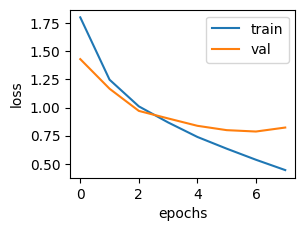

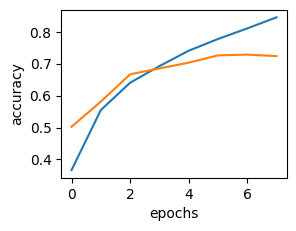

In [10]:
plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model.save("_mymodel01")